# Vaccine Prediction 

## Business Case:Using Machine Learning and various data science libraries to build a model that can reliably predict if a person will have H1N1 and seasonal vaccine. We will use the following pipeline to create a reliable model:

### About Data:We are provided a dataset with 36 columns. The first column respondent_id is a unique and random identifier. The remaining  35 features are described below:

For all binary variables: 0 = No; 1 = Yes.

### Import the necessary libraries 

In [1]:
# All the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline 

# Get rid of all the warnings
import warnings 
warnings.filterwarnings('ignore')

# Models from Scikit-Learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# To convert categorical data into numerical data
from sklearn.preprocessing import LabelEncoder

# Model Evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score,f1_score
from sklearn.metrics import plot_roc_curve,roc_auc_score
from scipy import stats

In [2]:
df = pd.read_csv('training_set_features.csv')
df_extra_column = pd.read_csv('training_set_labels.csv')
df = df.join(df_extra_column['h1n1_vaccine'])
df = df.join(df_extra_column['seasonal_vaccine'])

In [5]:
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [6]:
df_extra_column.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


## Basic Checks

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [9]:
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


### Check the null values

In [11]:
df.isnull().sum()

respondent_id                      0
h1n1_concern                      92
h1n1_knowledge                   116
behavioral_antiviral_meds         71
behavioral_avoidance             208
behavioral_face_mask              19
behavioral_wash_hands             42
behavioral_large_gatherings       87
behavioral_outside_home           82
behavioral_touch_face            128
doctor_recc_h1n1                2160
doctor_recc_seasonal            2160
chronic_med_condition            971
child_under_6_months             820
health_worker                    804
health_insurance               12274
opinion_h1n1_vacc_effective      391
opinion_h1n1_risk                388
opinion_h1n1_sick_from_vacc      395
opinion_seas_vacc_effective      462
opinion_seas_risk                514
opinion_seas_sick_from_vacc      537
age_group                          0
education                       1407
race                               0
sex                                0
income_poverty                  4423
m

In [12]:
df = df.dropna(axis=0, how="any")

In [13]:
df.isnull().sum()

respondent_id                  0
h1n1_concern                   0
h1n1_knowledge                 0
behavioral_antiviral_meds      0
behavioral_avoidance           0
behavioral_face_mask           0
behavioral_wash_hands          0
behavioral_large_gatherings    0
behavioral_outside_home        0
behavioral_touch_face          0
doctor_recc_h1n1               0
doctor_recc_seasonal           0
chronic_med_condition          0
child_under_6_months           0
health_worker                  0
health_insurance               0
opinion_h1n1_vacc_effective    0
opinion_h1n1_risk              0
opinion_h1n1_sick_from_vacc    0
opinion_seas_vacc_effective    0
opinion_seas_risk              0
opinion_seas_sick_from_vacc    0
age_group                      0
education                      0
race                           0
sex                            0
income_poverty                 0
marital_status                 0
rent_or_own                    0
employment_status              0
hhs_geo_re

### Converting categorical data into binary data
Before we performed the following changes , these values were replaced with more easily accessable values.

### Age Group

In [14]:
#age_group to age
df.age_group.unique()

array(['35 - 44 Years', '45 - 54 Years', '55 - 64 Years', '18 - 34 Years',
       '65+ Years'], dtype=object)

In [15]:
df.age_group.head()

1     35 - 44 Years
7     45 - 54 Years
10    45 - 54 Years
11    55 - 64 Years
15    35 - 44 Years
Name: age_group, dtype: object

In [16]:
#let '18 - 34 Years' -> 0 , '35 - 44 Years' -> 1 , '45 - 54 Years'-> 2 , '55 - 64 Years' -> 3 and '65+ Years' -> 4.
le = LabelEncoder()
label = le.fit_transform(df['age_group'])
df.age_group = label
df.age_group

1        1
7        2
10       2
11       3
15       1
        ..
26681    0
26683    3
26690    2
26699    2
26703    0
Name: age_group, Length: 6437, dtype: int32

### Education

In [18]:
df.education

1                12 Years
7            Some College
10               12 Years
11       College Graduate
15       College Graduate
               ...       
26681    College Graduate
26683    College Graduate
26690    College Graduate
26699        Some College
26703    College Graduate
Name: education, Length: 6437, dtype: object

In [19]:
le = LabelEncoder()
label = le.fit_transform(df['education'])
df.education = label 
df.education

1        0
7        3
10       0
11       2
15       2
        ..
26681    2
26683    2
26690    2
26699    3
26703    2
Name: education, Length: 6437, dtype: int32

### Race

In [20]:
df.race

1           White
7           White
10          White
11          White
15          White
           ...   
26681       White
26683       White
26690    Hispanic
26699       White
26703       White
Name: race, Length: 6437, dtype: object

In [21]:
le = LabelEncoder()
label = le.fit_transform(df['race'])
df.race = label 
df.race

1        3
7        3
10       3
11       3
15       3
        ..
26681    3
26683    3
26690    1
26699    3
26703    3
Name: race, Length: 6437, dtype: int32

### Other data

In [22]:
column_list= [ 'sex','income_poverty','marital_status','rent_or_own','employment_status','hhs_geo_region','census_msa', 'employment_industry','employment_occupation']
for data in column_list:
    le = LabelEncoder()
    label = le.fit_transform(df[data])
    df[data] = label 

In [23]:
df

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,1,0,0.0,0.0,12,19,0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,2,2.0,0.0,12,20,1,1
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,0,6,0,2.0,0.0,19,13,1,1
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,8,2,1.0,2.0,19,1,1,1
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,6,0,1.0,3.0,18,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,26681,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,5,0,1.0,0.0,0,0,0,0
26683,26683,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0,0,3,0,1.0,0.0,4,2,1,1
26690,26690,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,7,1,2.0,1.0,7,11,0,0
26699,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,9,0,1.0,0.0,12,19,0,0


## Rename the values

In [24]:
df.rename(columns = { 
    'respondent_id' : 'id' ,
    'h1n1_concern' : 'hc',
    'h1n1_knowledge' : 'hk',
    'behavioral_antiviral_meds' : 'bam',
    'behavioral_avoidance' : 'ba',
    'behavioral_face_mask' : 'bfm',
    'behavioral_wash_hands' : 'bwh',
    'behavioral_large_gatherings' : 'blg',
    'behavioral_outside_home' : 'boh',
    'behavioral_touch_face' : 'btf',
    'doctor_recc_h1n1' : 'drh',
    'doctor_recc_seasonal' : 'drs',
    'chronic_med_condition' : 'cmc',
    'child_under_6_months' : 'cusm',
    'health_worker' : 'hw',
    'health_insurance' : 'hi',
    'opinion_h1n1_vacc_effective' :'ohve',
    'opinion_h1n1_risk' : 'ohr',
    'opinion_h1n1_sick_from_vacc' : 'ohsfv',
    'opinion_seas_vacc_effective' : 'osve',
    'opinion_seas_risk' : 'osr',
    'opinion_seas_sick_from_vacc' : 'ossfv',
    'age_group' : 'ag',
    'education' : 'ed',
    'race' : 'race',
    'sex' : 'sex',
    'income_poverty' : 'ip',
    'marital_status' : 'ms',
    'rent_or_own' : 'roo',
    'employment_status' : 'es',
    'hhs_geo_region' : 'hgr',
    'census_msa' : 'cm',
    'household_adults' : 'houa',
    'household_children' : 'houc',
    'employment_industry' : 'ei',
    'employment_occupation' : 'eo',
    'h1n1_vaccine' : 'target1' ,
    'seasonal_vaccine' : 'target2',

}, inplace= True)
df

,id,hc,hk,bam,ba,bfm,bwh,blg,boh,btf,...,roo,es,hgr,cm,houa,houc,ei,eo,target1,target2
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,1,0,1,0,0.0,0.0,12,19,0,1
7,7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,1,2,2.0,0.0,12,20,1,1
10,10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1,0,6,0,2.0,0.0,19,13,1,1
11,11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0,0,8,2,1.0,2.0,19,1,1,1
15,15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0,0,6,0,1.0,3.0,18,5,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,26681,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,0,0,5,0,1.0,0.0,0,0,0,0
26683,26683,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,...,0,0,3,0,1.0,0.0,4,2,1,1
26690,26690,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,0,7,1,2.0,1.0,7,11,0,0
26699,26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,0,0,9,0,1.0,0.0,12,19,0,0


In [25]:
df.es.unique()

array([0])

## Exploratory Data Analysis
We will perform two types of analysis:

* Univariate analysis
* Bivariate Analysis
### H1C1 concern

Text(0, 0.5, 'Number of People')

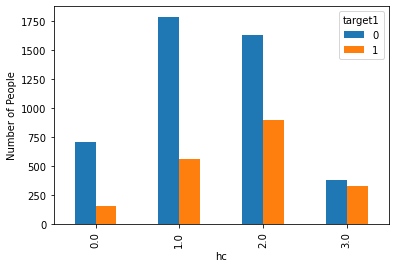

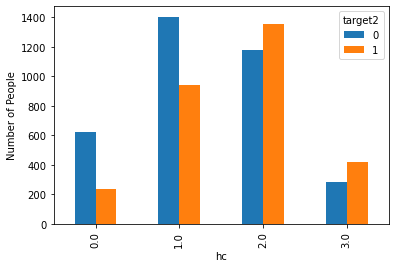

In [26]:
pd.crosstab(df.hc , df.target1).plot(kind="bar")
plt.ylabel('Number of People')
pd.crosstab(df.hc , df.target2).plot(kind="bar")
plt.ylabel('Number of People')

### Other data

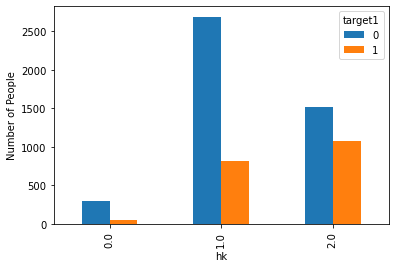

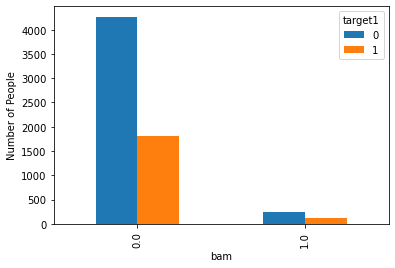

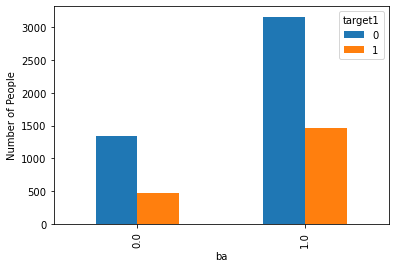

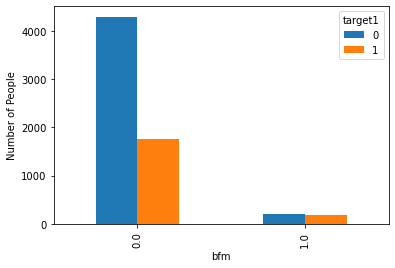

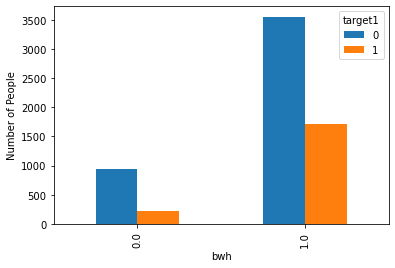

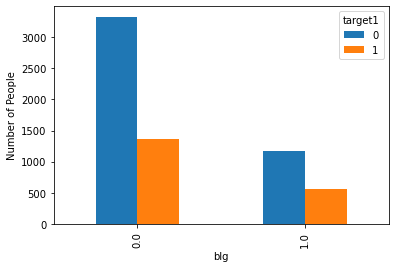

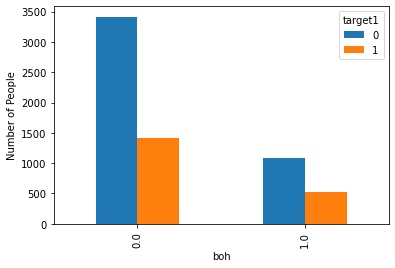

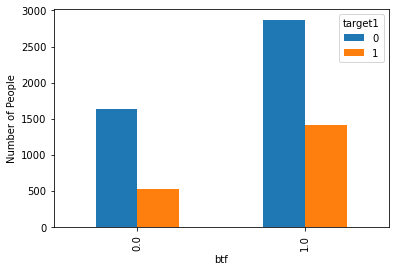

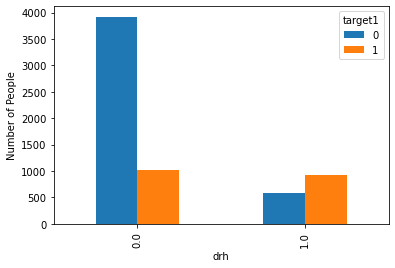

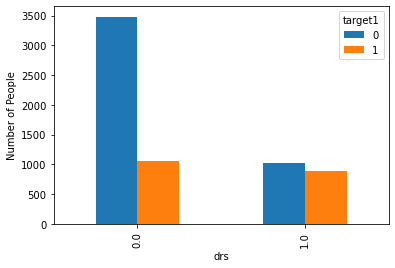

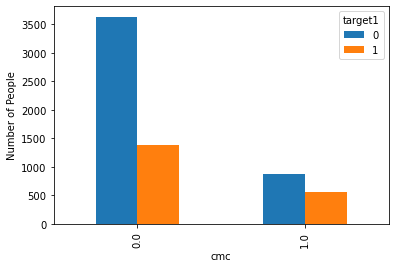

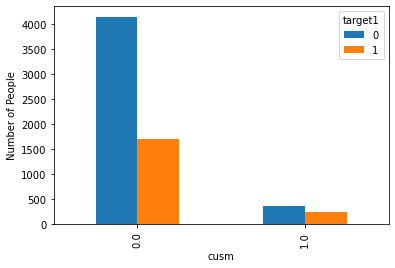

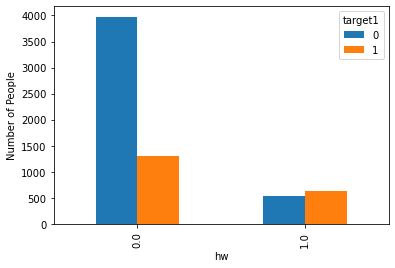

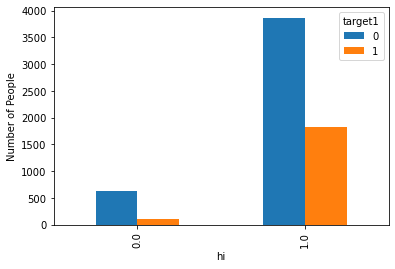

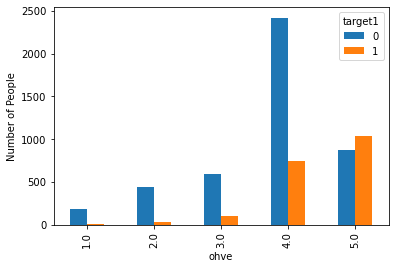

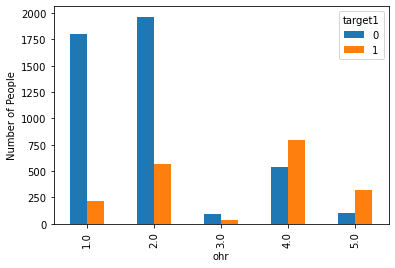

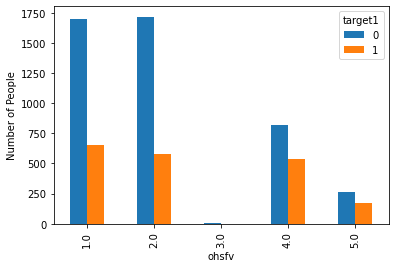

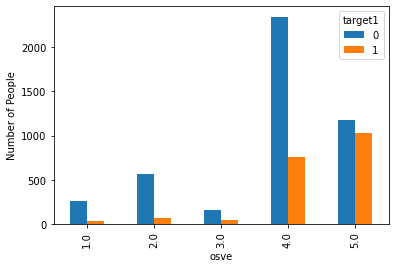

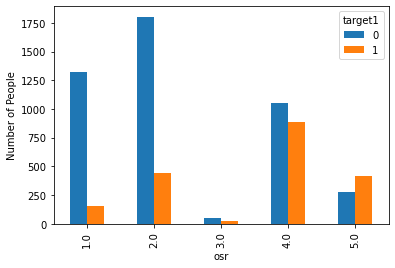

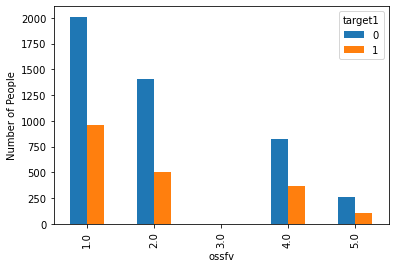

In [27]:
column_list=['hk','bam','ba','bfm','bwh','blg','boh','btf','drh','drs','cmc','cusm','hw','hi','ohve','ohr','ohsfv','osve','osr','ossfv']
for data in column_list:
    pd.crosstab(df[data] , df['target1']).plot(kind="bar")
    plt.ylabel('Number of People')

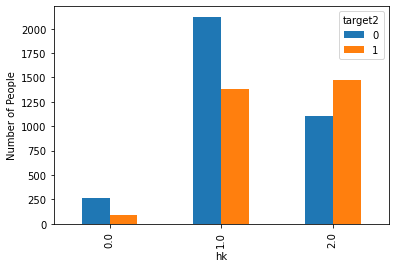

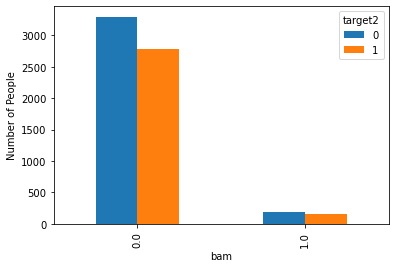

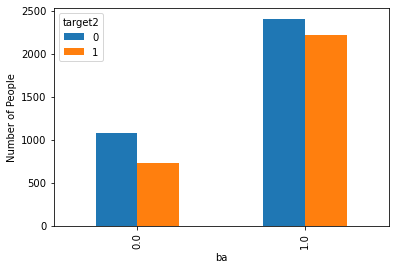

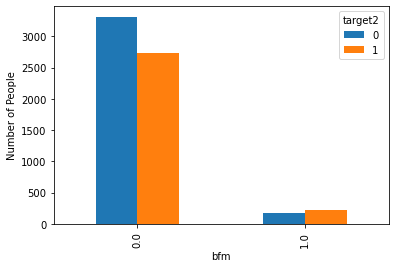

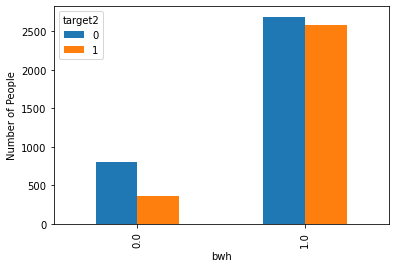

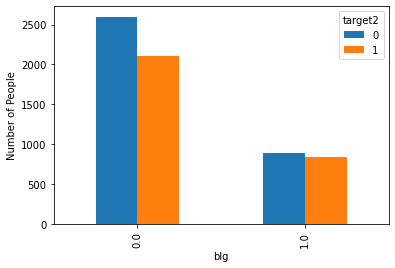

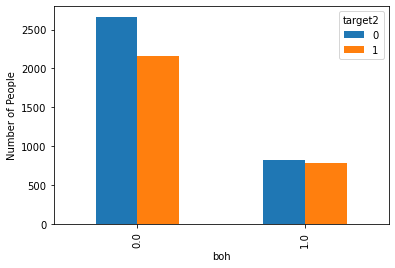

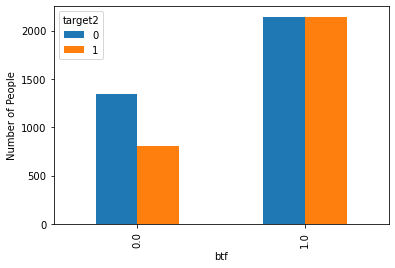

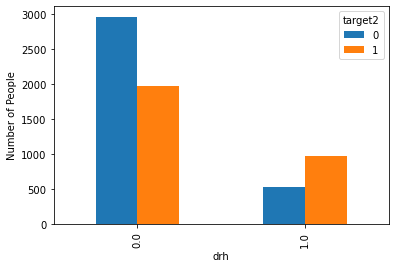

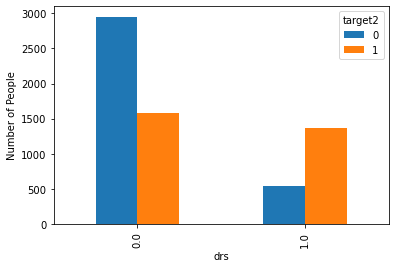

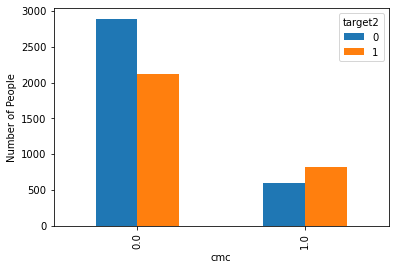

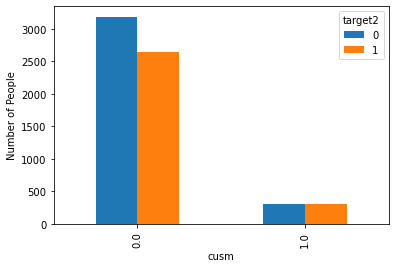

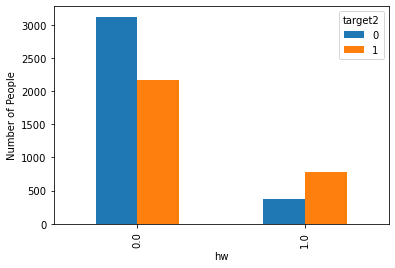

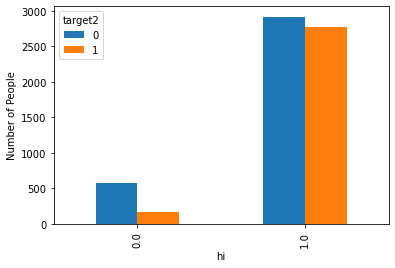

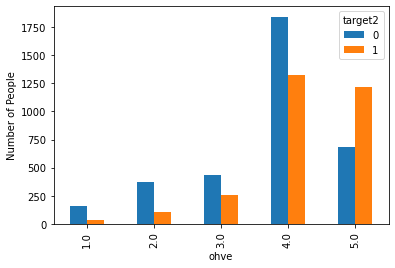

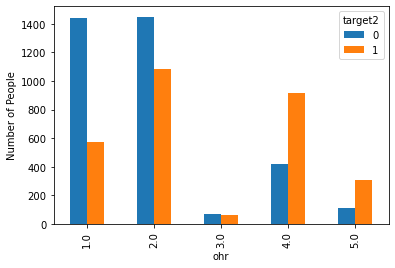

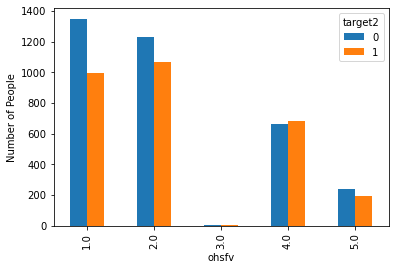

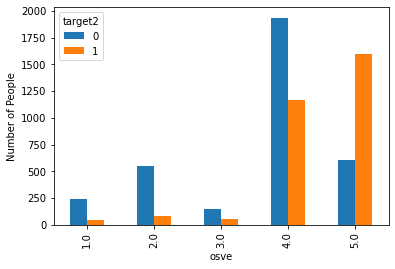

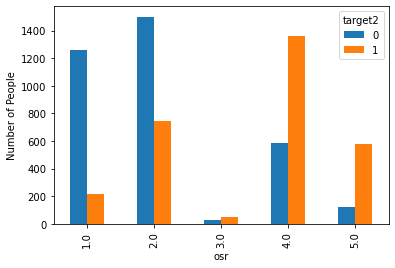

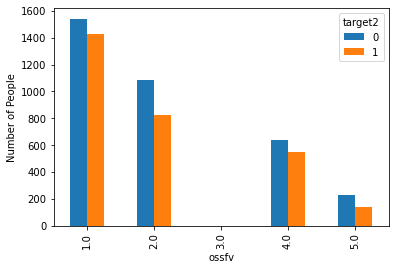

In [28]:
column_list=['hk','bam','ba','bfm','bwh','blg','boh','btf','drh','drs','cmc','cusm','hw','hi','ohve','ohr','ohsfv','osve','osr','ossfv']
for data in column_list:
    pd.crosstab(df[data] , df['target2']).plot(kind="bar")
    plt.ylabel('Number of People')

### Bivariate Analysis
We will pair Target variables against other data

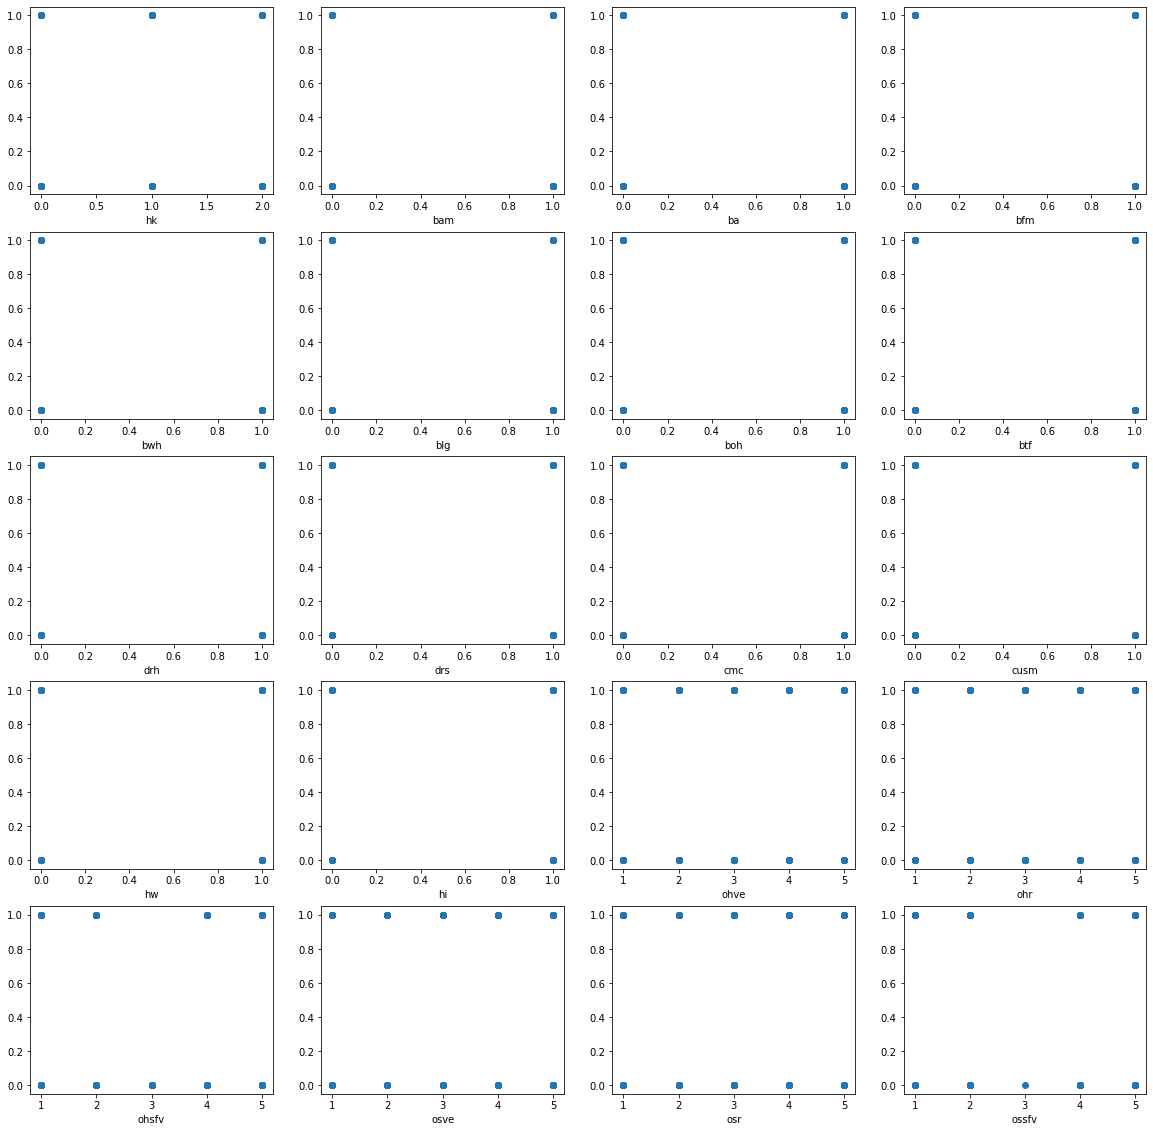

In [29]:
#target1
column_list=['hk','bam','ba','bfm','bwh','blg','boh','btf','drh','drs','cmc','cusm','hw','hi','ohve','ohr','ohsfv','osve','osr','ossfv']
fig , axs = plt.subplots(5,4,figsize=(20,20))

a=0
for i in range(0,5):
    for j in range(0,4):
        axs[i][j].scatter(df[column_list[a]],df.target1)
        axs[i][j].set_xlabel(column_list[a])
        a+=1
        

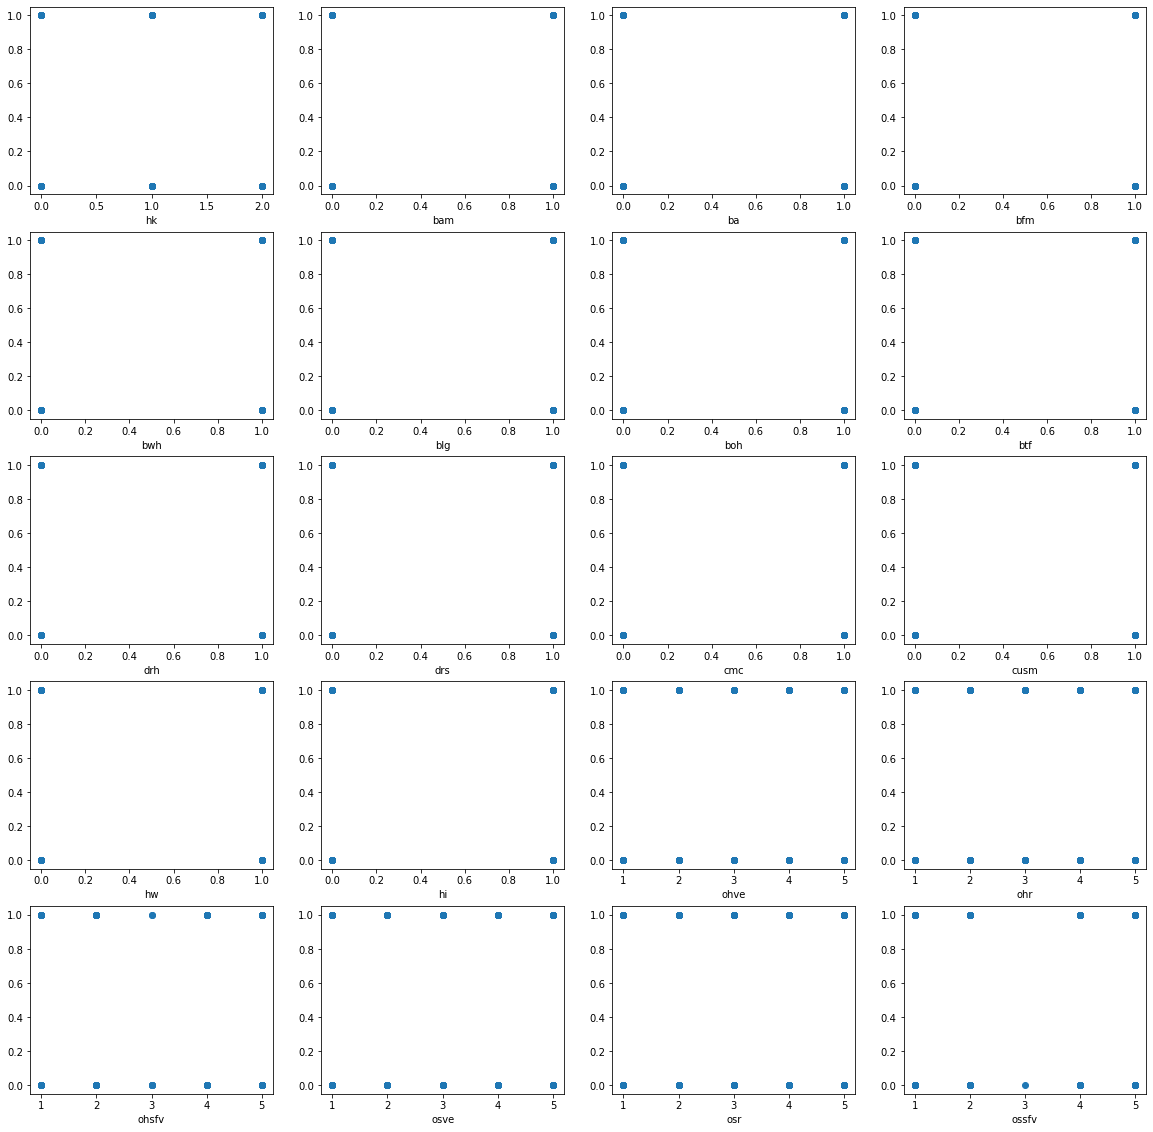

In [30]:
#target2
column_list=['hk','bam','ba','bfm','bwh','blg','boh','btf','drh','drs','cmc','cusm','hw','hi','ohve','ohr','ohsfv','osve','osr','ossfv']
fig , axs = plt.subplots(5,4,figsize=(20,20))

a=0
for i in range(0,5):
    for j in range(0,4):
        axs[i][j].scatter(df[column_list[a]],df.target2)
        axs[i][j].set_xlabel(column_list[a])
        a+=1
        

### Dealing with outliers

In [31]:
#to preserve accuracy we will not check for outliers

### Features

We will deal with the important features only , this is done by dropping all the unnecessary values

In [33]:
## Dropping the columns
#All the values are zero meaning that all people are employed 
df = df.drop('es' , axis=1)
df = df.drop('id' , axis=1)

### Checking for correlation

[]

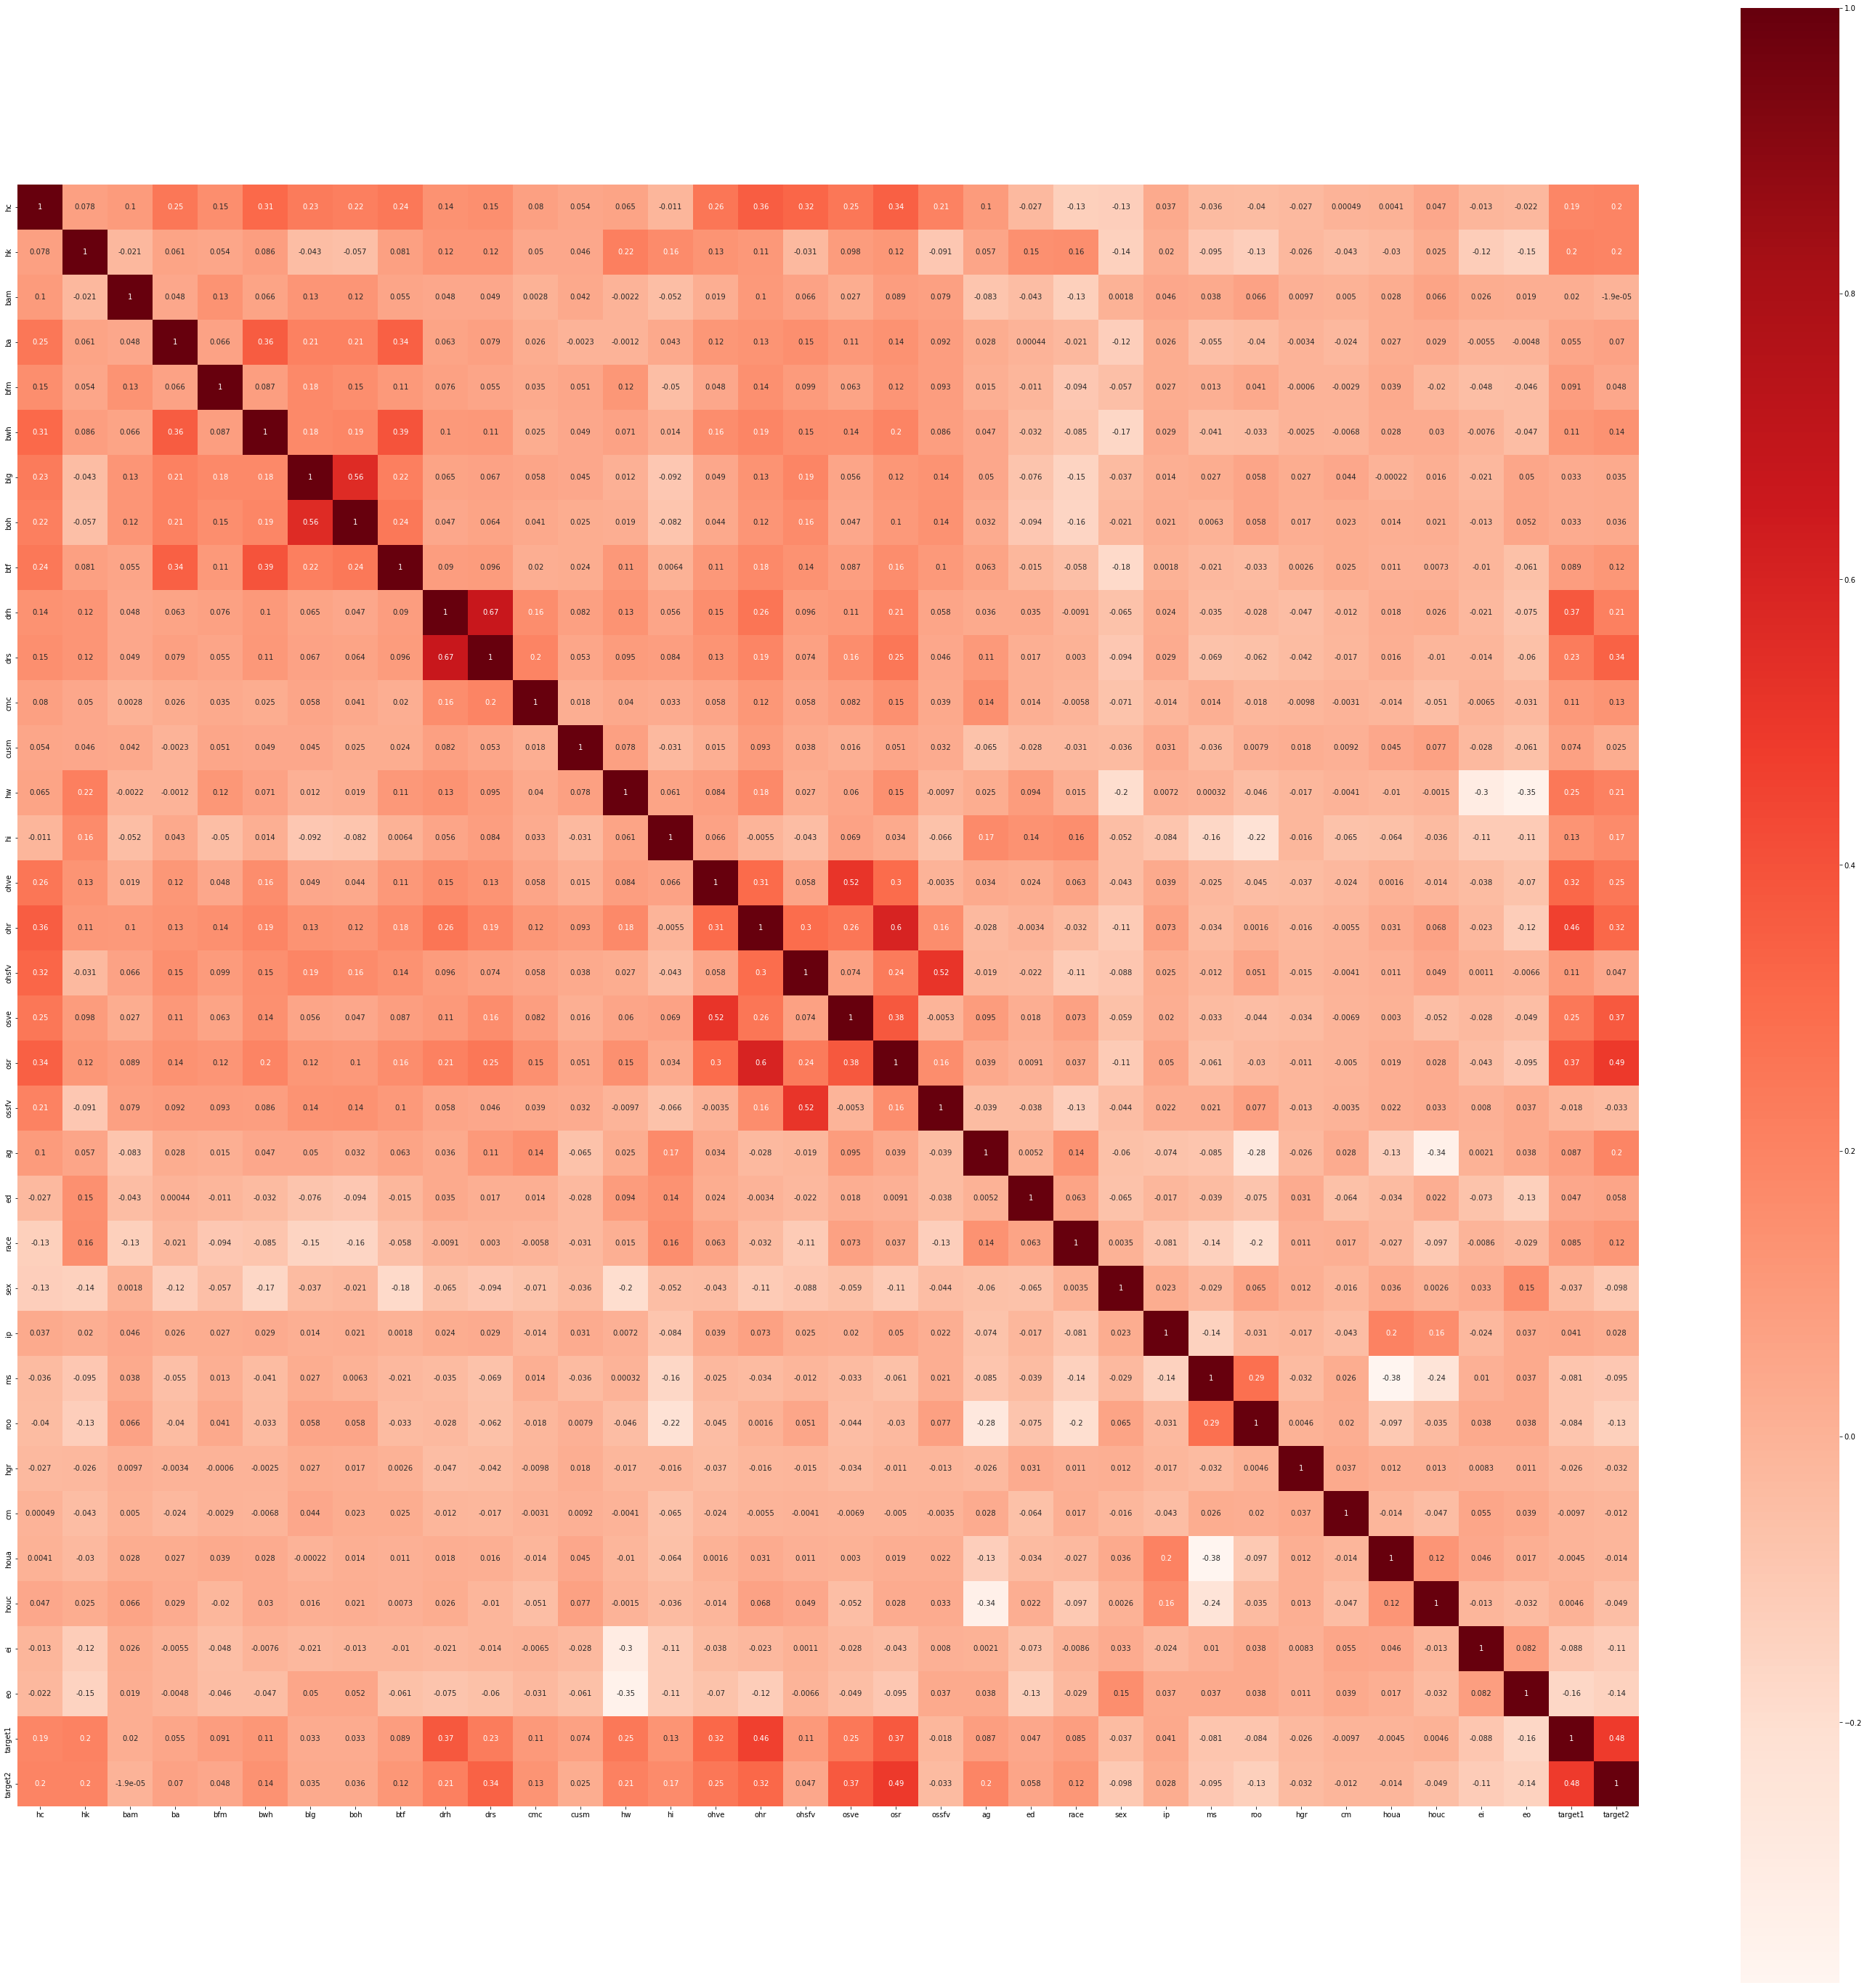

In [34]:
plt.figure(figsize = (50,50))
sns.heatmap(df.corr(), cmap= 'Reds', annot = True , cbar=True , square= True)
plt.plot()

## Modelling

### Preparing the training and testing data

In [35]:
x= df.drop(['target1','target2'],axis =1 )
y1= df['target1']
y2= df['target2']

In [36]:
x

,hc,hk,bam,ba,bfm,bwh,blg,boh,btf,drh,...,sex,ip,ms,roo,hgr,cm,houa,houc,ei,eo
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,2,1,1,1,0,0.0,0.0,12,19
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,2,2.0,0.0,12,20
10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,1,6,0,2.0,0.0,19,13
11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,8,2,1.0,2.0,19,1
15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,6,0,1.0,3.0,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,5,0,1.0,0.0,0,0
26683,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0,1,0,0,3,0,1.0,0.0,4,2
26690,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,7,1,2.0,1.0,7,11
26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,9,0,1.0,0.0,12,19


In [37]:
y1

1        0
7        1
10       1
11       1
15       0
        ..
26681    0
26683    1
26690    0
26699    0
26703    0
Name: target1, Length: 6437, dtype: int64

In [38]:
y2

1        1
7        1
10       1
11       1
15       0
        ..
26681    0
26683    1
26690    0
26699    0
26703    0
Name: target2, Length: 6437, dtype: int64

In [39]:
#setting up training and testing data
x1_train , x1_test , y1_train , y1_test = train_test_split(x,y1,test_size=0.2 , random_state= 42 )
x2_train , x2_test , y2_train , y2_test = train_test_split(x,y2,test_size=0.2 , random_state= 42 )

In [51]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()#object creation of logistic regression
    
log_reg.fit(x1_train,y1_train)#training model with training data

LogisticRegression()

In [52]:
y1_train_pre=log_reg.predict(x1_train)# predicting y_train 

Let's see how well our model performs on the test data set

In [53]:
y_pred = log_reg.predict(x1_test) # testing model 

In [54]:
y1_train.shape # to know the shape of y_train (rows and columns)

(5149,)

In [55]:
y_pred.shape # to know the shape of y_pred (rows and columns )

(1288,)

In [56]:
## calculating accuracy
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score,recall_score,classification_report,f1_score

In [60]:
#Accuracy
test_accuracy = accuracy_score(y1_test,y_pred)
test_accuracy

0.8268633540372671

In [61]:
# Precison
Precision = precision_score(y1_test,y_pred)# the number of true positive divided by the total number of positive prediction
Precision

0.740625

In [62]:
# Recall
Recall = recall_score(y1_test,y_pred)# the total number of positive results how many positives were correctly predicted by the model.
Recall

0.6286472148541115

In [63]:
# F1 Score
F1_Score = f1_score(y1_test,y_pred)# when precision and recall both are important
F1_Score

0.6800573888091822

In [65]:
# Area Under Curve
auc = roc_auc_score(y1_test, y_pred)
auc

0.7687692715324344

In [66]:
##confusion matrix
pd.crosstab(y1_test, y_pred)

col_0,0,1
target1,,
0,828,83
1,140,237


In [67]:
report=classification_report(y1_test, y_pred)# it will give precision,recall,f1 scores and accuracy  
print(report)

              precision    recall  f1-score   support

           0       0.86      0.91      0.88       911
           1       0.74      0.63      0.68       377

    accuracy                           0.83      1288
   macro avg       0.80      0.77      0.78      1288
weighted avg       0.82      0.83      0.82      1288



### ROC PLOT

In [74]:
## Prediciting the probabilities of class 1
probs=log_reg.predict_proba(x1_test)[:,1]

In [76]:
probs

array([0.18155897, 0.05523125, 0.36807133, ..., 0.94000075, 0.10114671,
       0.35268687])

In [78]:
## Defining the threshold limit
def predict_threshold (model,X1_test,thresholds):
    return np.where(model.predict_proba(X1_test)[:,1]>thresholds,1,0)#checking where probability of class 1 is  greater than threshold

In [79]:
import numpy as np
from sklearn.metrics import confusion_matrix
for thr in np.arange(0,1.0,0.1):# it will create matrix /array from range 0 to 1 with step 0.1
    y_predict = predict_threshold(log_reg,x1_test,thr)# it will check result  for  each threshold from 0 to 0.1
    print("Threshold :",thr)#printing threshold
    print(confusion_matrix(y1_test,y_pred))# confusion matrix for each prediction

Threshold : 0.0
[[828  83]
 [140 237]]
Threshold : 0.1
[[828  83]
 [140 237]]
Threshold : 0.2
[[828  83]
 [140 237]]
Threshold : 0.30000000000000004
[[828  83]
 [140 237]]
Threshold : 0.4
[[828  83]
 [140 237]]
Threshold : 0.5
[[828  83]
 [140 237]]
Threshold : 0.6000000000000001
[[828  83]
 [140 237]]
Threshold : 0.7000000000000001
[[828  83]
 [140 237]]
Threshold : 0.8
[[828  83]
 [140 237]]
Threshold : 0.9
[[828  83]
 [140 237]]


In [80]:
## visualizing the roc plot
def plot_roc_curve(fpr, tpr):# function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')#line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')# assigning name to  x axis
    plt.ylabel('True Positive Rate')# assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
    plt.legend()#area describing the elements of the graph
    plt.show()#to show graph without location

In [81]:
from sklearn.metrics import roc_auc_score,roc_curve ## used to compare multiple models
auc = roc_auc_score(y1_test, probs) #roc curve 
print('AUC: %.2f' % auc)

AUC: 0.86


## KNN

In [82]:
x= df.drop(['target1','target2'],axis =1 )
y1= df['target1']
y2= df['target2']

In [83]:
x

,hc,hk,bam,ba,bfm,bwh,blg,boh,btf,drh,...,sex,ip,ms,roo,hgr,cm,houa,houc,ei,eo
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,2,1,1,1,0,0.0,0.0,12,19
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,2,2.0,0.0,12,20
10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,1,6,0,2.0,0.0,19,13
11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,8,2,1.0,2.0,19,1
15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,6,0,1.0,3.0,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,5,0,1.0,0.0,0,0
26683,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0,1,0,0,3,0,1.0,0.0,4,2
26690,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,7,1,2.0,1.0,7,11
26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,9,0,1.0,0.0,12,19


In [84]:
#setting up training and testing data
x1_train , x1_test , y1_train , y1_test = train_test_split(x,y1,test_size=0.2 , random_state= 42 )
x2_train , x2_test , y2_train , y2_test = train_test_split(x,y2,test_size=0.2 , random_state= 42 )

In [89]:
## taking optimal k to determine how many nearest neighbors  to create

# create a list to store the error values for each k
error_rate = []

# Will take some time
for i in range(1,11):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x1_train,y1_train)
    pred_i = knn.predict(x1_test)
    error_rate.append(np.mean(pred_i != y1_test)) 
    # if predicted value is not equal to actual value, returns true (which is taken as 1) else false(0). 
    # Adds all the value and takes mean of it. So for each k-value, gets the mean of error.
    #print(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

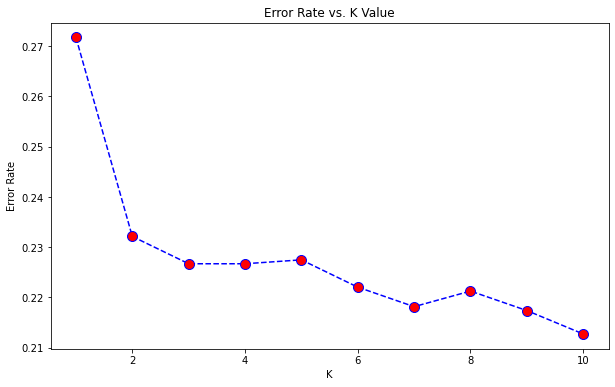

In [90]:
# Lets plot the k-value and error rate

plt.figure(figsize=(10,6))
plt.plot(range(1,11),error_rate,color='blue', linestyle='dashed', 
         marker='o',markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [92]:
# let's fit the data into KNN model and see how well it performs:
knn = KNeighborsClassifier(n_neighbors=7)
knn.fit(x1_train,y1_train)# Predict 
y_pred = knn.predict(x1_test)

In [93]:
# Checking Accuracy score
print("The accuracy score is : ", accuracy_score(y1_test,y_pred))

The accuracy score is :  0.781832298136646


In [94]:
print(classification_report(y1_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       911
           1       0.67      0.50      0.57       377

    accuracy                           0.78      1288
   macro avg       0.74      0.70      0.71      1288
weighted avg       0.77      0.78      0.77      1288



## Random Forest

In [95]:
x= df.drop(['target1','target2'],axis =1 )
y1= df['target1']
y2= df['target2']

In [96]:
x

,hc,hk,bam,ba,bfm,bwh,blg,boh,btf,drh,...,sex,ip,ms,roo,hgr,cm,houa,houc,ei,eo
1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,...,1,2,1,1,1,0,0.0,0.0,12,19
7,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,...,0,0,0,0,1,2,2.0,0.0,12,20
10,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,...,1,0,0,1,6,0,2.0,0.0,19,13
11,1.0,2.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1,1,0,0,8,2,1.0,2.0,19,1
15,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,6,0,1.0,3.0,18,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26681,2.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,5,0,1.0,0.0,0,0
26683,1.0,2.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,1.0,...,0,1,0,0,3,0,1.0,0.0,4,2
26690,0.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0,0,0,0,7,1,2.0,1.0,7,11
26699,2.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,...,0,0,0,0,9,0,1.0,0.0,12,19


In [97]:
#setting up training and testing data
x1_train , x1_test , y1_train , y1_test = train_test_split(x,y1,test_size=0.2 , random_state= 42 )
x2_train , x2_test , y2_train , y2_test = train_test_split(x,y2,test_size=0.2 , random_state= 42 )

In [98]:
from sklearn.tree import DecisionTreeClassifier#importing decision tree from sklearn.tree
dt=DecisionTreeClassifier()#object creation for decision tree  
dt.fit(x1_train,y1_train)#training the model
y_hat=dt.predict(x1_test)#prediction
y_hat#predicted values 

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [99]:
y1_train_predict=dt.predict(x1_train)#predicting training data to check training performance 
y1_train_predict

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [100]:
## Evalauting the model
from sklearn.metrics import accuracy_score,classification_report,f1_score#importing mertics to check model performance
##Training score
y1_train_predict=dt.predict(x1_train)#passing X_train to predict Y_train
acc_train=accuracy_score(y1_train,y1_train_predict)#checking accuracy
acc_train


1.0

In [101]:
print(classification_report(y1_train,y1_train_predict))# it will give precision,recall,f1 scores and accuracy  

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3591
           1       1.00      1.00      1.00      1558

    accuracy                           1.00      5149
   macro avg       1.00      1.00      1.00      5149
weighted avg       1.00      1.00      1.00      5149



In [102]:
pd.crosstab(y1_train,y1_train_predict)#it will show you confusion matrix

col_0,0,1
target1,,
0,3591,0
1,0,1558


In [103]:
## test acc
test_acc=accuracy_score(y1_test,y_hat)#testing accuracy 
test_acc

0.7305900621118012

In [104]:
print(classification_report(y1_test,y_hat))# for  testing 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       911
           1       0.54      0.53      0.54       377

    accuracy                           0.73      1288
   macro avg       0.67      0.67      0.67      1288
weighted avg       0.73      0.73      0.73      1288



In [105]:
print(classification_report(y1_test,y_hat))# for  testing 

              precision    recall  f1-score   support

           0       0.81      0.81      0.81       911
           1       0.54      0.53      0.54       377

    accuracy                           0.73      1288
   macro avg       0.67      0.67      0.67      1288
weighted avg       0.73      0.73      0.73      1288



## Testing the Models

In [106]:
# Put Models in a Dictionary
models = {
    "Logistic Regression":LogisticRegression(),
    "KNN":KNeighborsClassifier(),
    "Random Forest":RandomForestClassifier()
}

# Create a function to fit and score models
def fit_and_score(models, x_train, x_test, y_train, y_test):
    # set random seeds
    np.random.seed(42)
    # Make a dictionary to keep model scores
    model_scores = {}
    # Loop through models
    for name, model in models.items():
        # Fit the model to the data
        model.fit(x_train, y_train)
        # Evaluate the model and append its score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores

model_scores1 = fit_and_score(models=models, x_train=x1_train, x_test=x1_test, y_train = y1_train, y_test = y1_test)
model_scores2 = fit_and_score(models=models, x_train=x2_train, x_test=x2_test, y_train = y2_train, y_test = y2_test)
#target1
model_scores1

{'Logistic Regression': 0.8268633540372671,
 'KNN': 0.7725155279503105,
 'Random Forest': 0.828416149068323}

In [107]:
#target2
model_scores2

{'Logistic Regression': 0.7919254658385093,
 'KNN': 0.7305900621118012,
 'Random Forest': 0.7950310559006211}